# Clasification

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

(300, 2) (300,) (240, 2) (240,) (60, 2) (60,)


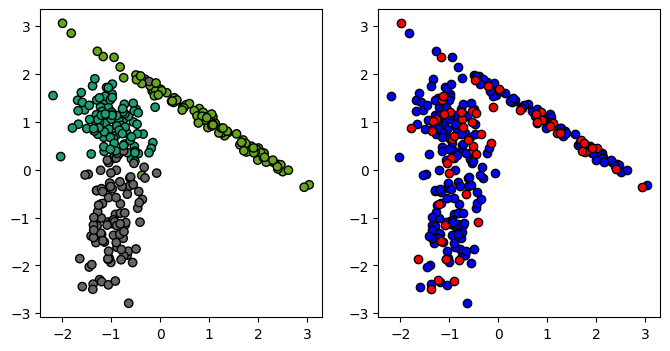

In [ ]:
# we create 100 separable points
X, y = make_classification(n_samples = 300, n_features=2, n_classes = 3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X.shape, y.shape, X_train.shape, y_train.shape,X_test.shape,y_test.shape)

# Plot train / test data
_,axes = plt.subplots(1,2, figsize = (8,4))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap="Dark2", edgecolors='k')
axes[1].scatter(X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c='r', edgecolors='k')
plt.show()

In [ ]:
'''
    --> Paste your plot_2d_decision_boundaries function here!
'''
def decisionBoundaries(model, X, num=100):
  import numpy as np
  offset=0.2
  x_min, x_max = X[:, 0].min() - offset, X[:, 0].max() + offset
  y_min, y_max = X[:, 1].min() - offset, X[:, 1].max() + offset
  x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, num), np.linspace(y_min, y_max, num))

  # Calcular las predicciones del modelo para la malla
  Z = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
  Z = Z.reshape(x_grid.shape)

  return x_grid, y_grid, Z


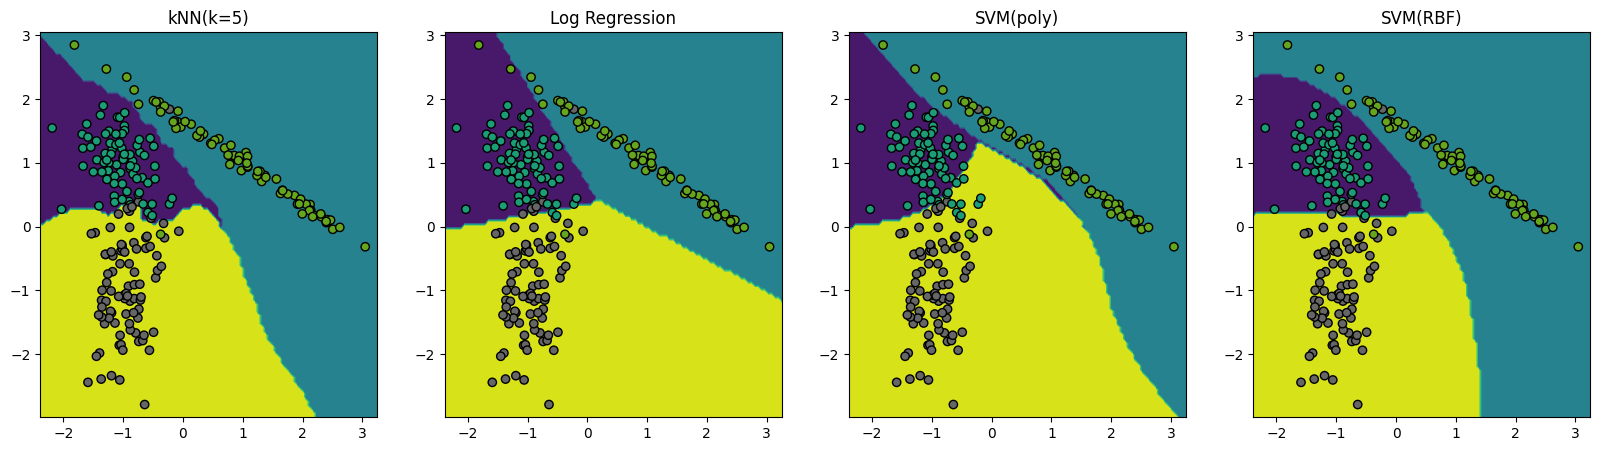

In [ ]:
from types import new_class
models = [kNN(n_neighbors=5, metric='euclidean'),
          LogisticRegression(),
          SVC(kernel = 'poly', C=2),
          SVC(kernel='rbf', C=2)]

names = ['kNN(k=5)', 'Log Regression', 'SVM(poly)', 'SVM(RBF)']

_, axes = plt.subplots(1,4, figsize = (20,5))
preds = {}

# fit the models
for i, model in enumerate(models) :
    #
    #clf = _
    model.fit(X_train,y_train )
    preds[names[i]] = model.predict(X_test)

    # Plot decision boundaries
    x_grid, y_grid, Z = decisionBoundaries(model, X_train)  # Obtener x_grid, y_grid, Z
    axes[i].contourf(x_grid, y_grid, Z, cmap="viridis") # Visualizar las fronteras de decisión

    # Plot train/test points
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="Dark2", edgecolors='k')

    axes[i].set_title(names[i])

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.950  	   0.950  	   0.950  	   0.950  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.933  	   0.933  	   0.933  	   0.933  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.900  	   0.900  	   0.900  	   0.900  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.967  	   0.967  	   0.967  	   0.967  	


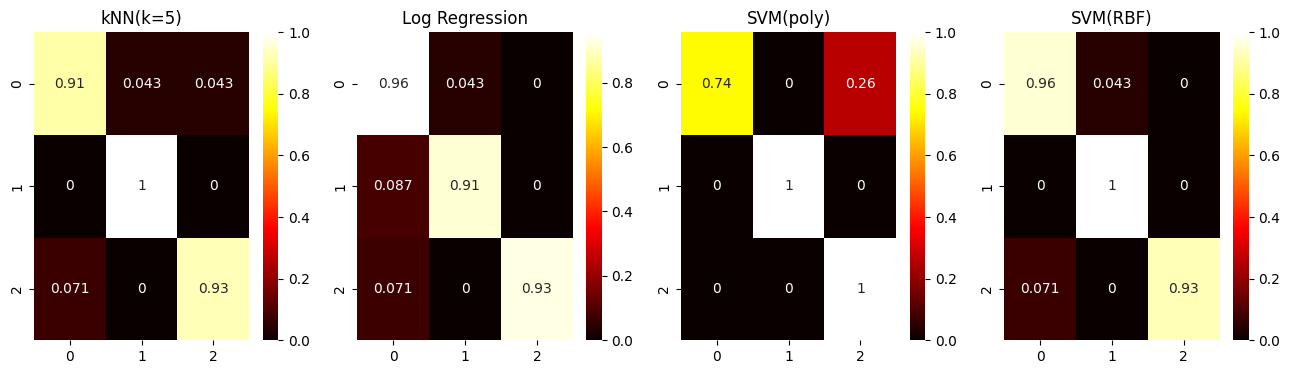

In [ ]:
_, axes = plt.subplots(1, 4 , figsize = (16,4))

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes) :
  print ("########----- Results for {0} -----########".format( _ ))
  accuracy = accuracy_score( y_test , preds[name] )
  precision = precision_score( y_test ,preds[name] , average = "micro")
  recall = recall_score( y_test , preds[name] , average = "micro")
  f1 = f1_score( y_test , preds[name] , average = "micro")
  cm = confusion_matrix( y_test , preds[name], normalize='true' )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax  )
  ax.set_title( name )

In [ ]:
for model, name in zip(models, names):
  metrics = cross_val_score(model, X_train, y_train, cv=5,scoring='f1_micro')
  print("classif scores for model: {0}".format(name))
  print(metrics)
  print('average score: {0}'.format(np.mean(metrics)))

classif scores for model: kNN(k=5)
[0.89583333 0.95833333 1.         0.97916667 0.97916667]
average score: 0.9625
classif scores for model: Log Regression
[0.95833333 0.95833333 0.97916667 0.91666667 0.95833333]
average score: 0.9541666666666666
classif scores for model: SVM(poly)
[0.95833333 0.95833333 0.95833333 0.9375     0.95833333]
average score: 0.9541666666666666
classif scores for model: SVM(RBF)
[0.95833333 0.97916667 0.97916667 0.9375     0.95833333]
average score: 0.9625


## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


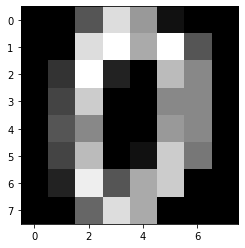

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

(1000, 3) (1000,) (800, 3) (800,) (200, 3) (200,)


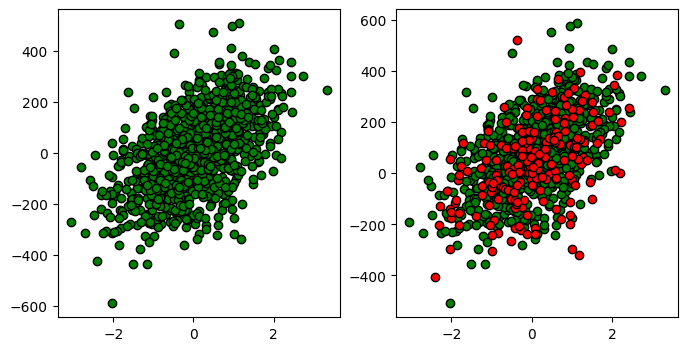

In [68]:
X, y = make_regression(n_samples = 1000, n_features = 3 , noise = 30 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X.shape, y.shape, X_train.shape, y_train.shape,X_test.shape,y_test.shape)



np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1
y_train = y_train + np.random.normal(len(y_train)) * 0.1


# Plot train / test data
_,axes = plt.subplots(1,2, figsize = (8,4))
axes[0].scatter(X[:, 0], y, c='g', edgecolors='k')
axes[1].scatter(X_train[:, 0], y_train, c='g', edgecolors='k')
axes[1].scatter(X_test[:, 0], y_test, c='r', edgecolors='k')
plt.show()


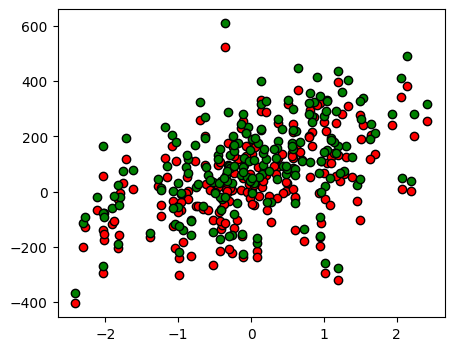

In [75]:
# Train a linear regression

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
_,axes = plt.subplots( figsize = (5,4))
plt.scatter(X_test[:, 0], y_test, c='r', edgecolors='k')
plt.scatter(X_test[:, 0], preds, c='g', edgecolors='k')
plt.show()



## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
# Compute MAE and MSE
mse_ = mean_squared_error(y_test, preds)
mae_ = mean_absolute_error(y_test, preds)
print("MSE: {0:.3f} \t MAE: {1:.3f}".format(mse_, mae_))

MSE: 4636.636 	 MAE: 60.850
